In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from IPython import display

Text(0.5, 1.0, 'Semi-Implicit Eulers Method for Simple Orbit')

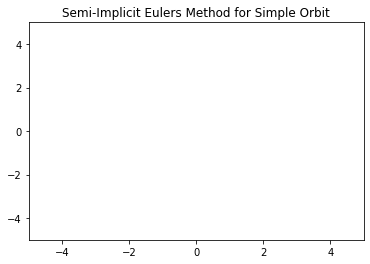

In [2]:
fig = plt.figure()
l, = plt.plot([],[],'k-')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Semi-Implicit Eulers Method for Simple Orbit')

In [3]:
def orbital(T):
    dt = 0.01
    #T = 100
    t = np.arange(0,T,dt)
    N = len(t)
    x,v,y,w = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),
    x[0] = 1    #initial condition for x
    y[0] = 0    #initial condition for y
    v[0] = 0    #initial condition for velocity_x
    w[0] = 0.5  #initial condition for velocity_y
    for i in range(0,N-1):
        t1 = (x[i]**2)+(y[i]**2)
        a1 = -(x[i])/(t1**(3/2))
        b1 = -(y[i])/(t1**(3/2))
        v[i+1] = v[i]+a1*dt
        w[i+1] = w[i]+b1*dt
        x[i+1] = x[i]+v[i+1]*dt
        y[i+1] = y[i]+w[i+1]*dt
    return x,y

In [4]:
T = 100    # arbitrary time
metadata = dict(title='Orbit',artist='Yao')
writer = PillowWriter(fps=30,metadata=metadata)
xlist = []
ylist = []
with writer.saving(fig,'orbit.gif',100):
    for i in range(300):        # Increase range for longer runtime
        xlist.append(orbital(T)[0][i])
        ylist.append(orbital(T)[1][i])
        l.set_data(xlist,ylist)
        writer.grab_frame()